<a href="https://colab.research.google.com/github/riddhigarg2605/Network-traffic-analysis-using-ML/blob/main/Network_Intrusion_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Network intrusion dataset**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving intrusion.csv to intrusion.csv


In [3]:
import io
import pandas as pd
intrusion = pd.read_csv(io.BytesIO(uploaded['intrusion.csv']))
intrusion.head

<bound method NDFrame.head of        Unnamed: 0  duration  ...  dst_host_srv_rerror_rate  check
0               1         0  ...                      0.00      0
1               2         0  ...                      0.00      0
2               3         0  ...                      0.00      1
3               4         0  ...                      0.01      0
4               5         0  ...                      0.00      0
...           ...       ...  ...                       ...    ...
25187       25188         0  ...                      1.00      1
25188       25189         0  ...                      0.00      1
25189       25190         0  ...                      1.00      1
25190       25191         0  ...                      0.00      1
25191       25192         0  ...                      0.00      1

[25192 rows x 40 columns]>

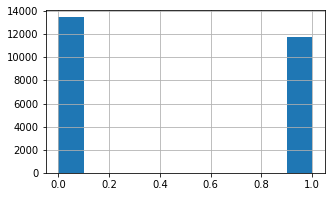

In [114]:
intrusion['check'].hist()
plt.rcParams['figure.figsize'] = (6, 4)


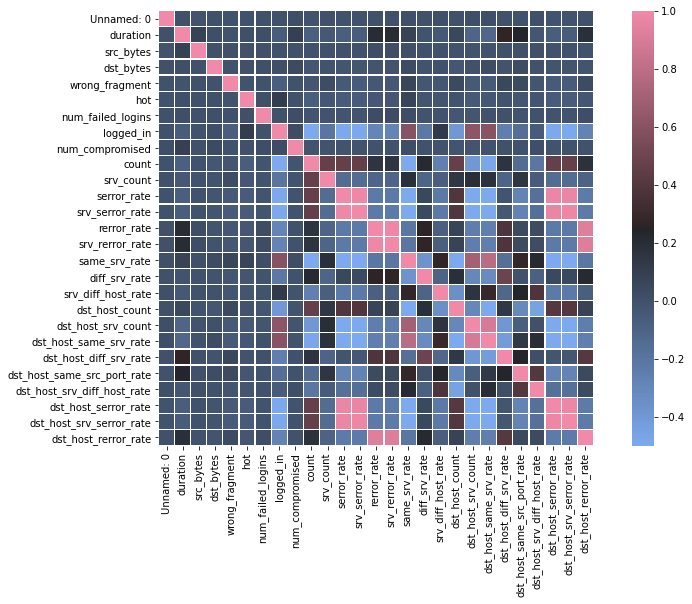

In [106]:
from scipy.stats import pearsonr
plt.rcParams['figure.figsize'] = (14, 8)

intr = intrusion.drop(['check','num_outbound_cmds','num_access_files','is_host_login','is_guest_login','num_root','land','root_shell','num_file_creations','num_shells','urgent','su_attempted'], axis = 1)
corr = intr.iloc[:,:-1].corr(method = 'pearson')
cmap = sns.diverging_palette(250,354,80,69, center = 'dark', as_cmap = True)
sns.heatmap(corr, vmax =1, vmin =-.5, cmap = cmap, square = True, linewidths = .2)


**Logistic Regression**



In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns 
from numpy import percentile
import math
y = intrusion.check
X = intrusion.drop(['check','num_outbound_cmds','num_access_files','is_host_login','is_guest_login'], axis = 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [6]:
intrusion_logmodel = LogisticRegression()

In [7]:
intrusion_logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
intrusion_logmodel.score(X_test,y_test)

0.8700714474728765

**Naive Bayes**

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
int_gmodel = GaussianNB()
int_gmodel.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [19]:
int_gmodel.score(X_test, y_test)

0.5625826938343477

**Random Forest**

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
feature_names = [f'feature {i}' for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [107]:
forest.score(X_test, y_test)

0.9966922466260916

In [108]:
forest_importances

feature 0     0.002557
feature 1     0.004619
feature 2     0.167244
feature 3     0.137930
feature 4     0.000055
feature 5     0.005089
feature 6     0.000000
feature 7     0.012605
feature 8     0.000221
feature 9     0.042238
feature 10    0.005915
feature 11    0.000184
feature 12    0.000009
feature 13    0.000452
feature 14    0.000261
feature 15    0.000026
feature 16    0.044605
feature 17    0.024392
feature 18    0.035950
feature 19    0.027804
feature 20    0.011224
feature 21    0.007095
feature 22    0.074626
feature 23    0.064293
feature 24    0.005480
feature 25    0.023978
feature 26    0.065522
feature 27    0.066180
feature 28    0.021524
feature 29    0.034135
feature 30    0.027928
feature 31    0.027375
feature 32    0.026034
feature 33    0.015342
feature 34    0.017106
dtype: float64

In [87]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.015 seconds


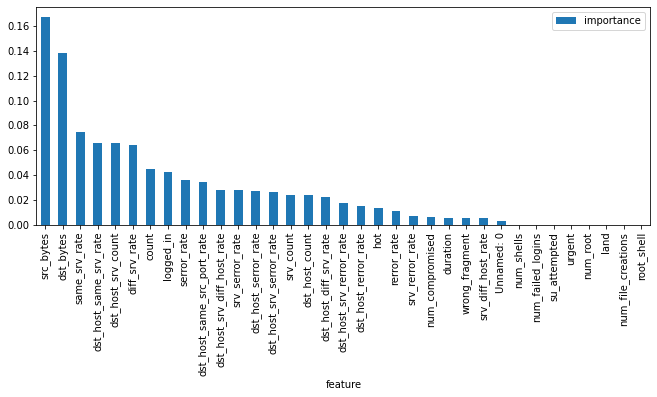

In [94]:
score = np.round(forest_importances,3)
importances = pd.DataFrame({'feature':X_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [96]:
reg = RandomForestRegressor(n_estimators=50)
reg.fit(intrusion, intrusion.check)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [54]:
reg.score(intrusion, intrusion.check)

1.0